In [11]:
#Import Dependencies 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy

In [12]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [13]:
# Add the latitudes and longitudes to a list.
coordinates=list(lat_lngs)

In [14]:
pip install citipy

Note: you may need to restart the kernel to use updated packages.


In [15]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

624

In [16]:
# Import the requests library.
import requests
# Import the API key.
from config import weather_api_key

In [17]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=860ab2894e489b6f8f740af795dec16b


In [18]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [19]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")
    

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | chilliwack
Processing Record 2 of Set 1 | lagoa
Processing Record 3 of Set 1 | butaritari
Processing Record 4 of Set 1 | guane
Processing Record 5 of Set 1 | kodiak
Processing Record 6 of Set 1 | fonte boa
Processing Record 7 of Set 1 | novelda
Processing Record 8 of Set 1 | ushuaia
Processing Record 9 of Set 1 | grindavik
Processing Record 10 of Set 1 | vaitupu
City not found. Skipping...
Processing Record 11 of Set 1 | arenillas
Processing Record 12 of Set 1 | komsomolskiy
Processing Record 13 of Set 1 | jiaojiang
Processing Record 14 of Set 1 | ust-kamchatsk
City not found. Skipping...
Processing Record 15 of Set 1 | polis
Processing Record 16 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 17 of Set 1 | arraial do cabo
Processing Record 18 of Set 1 | geraldton
Processing Record 19 of Set 1 | punta arenas
Processing Record 20 of Set 1 | barrow
Processing Record 21 of Set 1 |

Processing Record 39 of Set 4 | waddan
Processing Record 40 of Set 4 | sao joao da barra
Processing Record 41 of Set 4 | sur
Processing Record 42 of Set 4 | zhigansk
Processing Record 43 of Set 4 | talara
Processing Record 44 of Set 4 | chokurdakh
Processing Record 45 of Set 4 | warqla
City not found. Skipping...
Processing Record 46 of Set 4 | nichinan
Processing Record 47 of Set 4 | jingdezhen
Processing Record 48 of Set 4 | beringovskiy
Processing Record 49 of Set 4 | salinas
Processing Record 50 of Set 4 | nikolskoye
Processing Record 1 of Set 5 | edirne
Processing Record 2 of Set 5 | usti nad orlici
Processing Record 3 of Set 5 | hermiston
Processing Record 4 of Set 5 | palabuhanratu
City not found. Skipping...
Processing Record 5 of Set 5 | toulepleu
City not found. Skipping...
Processing Record 6 of Set 5 | mount pleasant
Processing Record 7 of Set 5 | tezu
Processing Record 8 of Set 5 | tamazulapam
City not found. Skipping...
Processing Record 9 of Set 5 | port blair
Processing

Processing Record 25 of Set 8 | noumea
Processing Record 26 of Set 8 | yemelyanovo
Processing Record 27 of Set 8 | saint-pierre
Processing Record 28 of Set 8 | harper
Processing Record 29 of Set 8 | nicoya
Processing Record 30 of Set 8 | iqaluit
Processing Record 31 of Set 8 | touros
Processing Record 32 of Set 8 | vanimo
Processing Record 33 of Set 8 | sulangan
Processing Record 34 of Set 8 | udachnyy
Processing Record 35 of Set 8 | penzance
Processing Record 36 of Set 8 | hamilton
Processing Record 37 of Set 8 | yantal
Processing Record 38 of Set 8 | tottori
Processing Record 39 of Set 8 | antofagasta
Processing Record 40 of Set 8 | lazaro cardenas
Processing Record 41 of Set 8 | alofi
Processing Record 42 of Set 8 | bagan
Processing Record 43 of Set 8 | bandarbeyla
Processing Record 44 of Set 8 | visby
Processing Record 45 of Set 8 | kabare
Processing Record 46 of Set 8 | kenai
Processing Record 47 of Set 8 | shitanjing
Processing Record 48 of Set 8 | samarai
Processing Record 49 of

Processing Record 13 of Set 12 | maceio
Processing Record 14 of Set 12 | freeport
Processing Record 15 of Set 12 | saiha
Processing Record 16 of Set 12 | mushie
Processing Record 17 of Set 12 | muisne
Processing Record 18 of Set 12 | ayagoz
Processing Record 19 of Set 12 | barawe
City not found. Skipping...
Processing Record 20 of Set 12 | sawakin
Processing Record 21 of Set 12 | lexington
Processing Record 22 of Set 12 | uarini
Processing Record 23 of Set 12 | san jeronimo
Processing Record 24 of Set 12 | hagere hiywet
Processing Record 25 of Set 12 | kjopsvik
Processing Record 26 of Set 12 | messina
Processing Record 27 of Set 12 | athabasca
Processing Record 28 of Set 12 | natal
Processing Record 29 of Set 12 | acapulco
Processing Record 30 of Set 12 | xinan
Processing Record 31 of Set 12 | verkhoyansk
Processing Record 32 of Set 12 | rameswaram
Processing Record 33 of Set 12 | miles city
Processing Record 34 of Set 12 | shiyan
Processing Record 35 of Set 12 | fort-shevchenko
Proces

In [20]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Chilliwack,49.17,-121.94,41.00,100,100,1.03,CA,2020-11-24 17:12:34
1,Lagoa,39.05,-27.98,57.31,63,46,18.05,PT,2020-11-24 17:15:57
2,Butaritari,3.07,172.79,81.37,79,8,14.90,KI,2020-11-24 17:15:57
3,Guane,22.20,-84.09,81.84,65,1,11.30,CU,2020-11-24 17:15:57
4,Kodiak,57.79,-152.41,39.20,64,1,3.36,US,2020-11-24 17:15:57
5,Fonte Boa,-2.50,-66.27,86.14,75,71,1.88,BR,2020-11-24 17:13:23
6,Novelda,38.38,-0.77,59.00,77,100,3.91,ES,2020-11-24 17:15:57
7,Ushuaia,-54.80,-68.30,44.60,70,75,18.34,AR,2020-11-24 17:15:58
8,Grindavik,63.84,-22.43,37.40,74,75,14.99,IS,2020-11-24 17:15:58
9,Arenillas,41.35,-2.85,43.54,62,100,6.55,ES,2020-11-24 17:15:58


In [21]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df [new_column_order]

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Chilliwack,CA,2020-11-24 17:12:34,49.17,-121.94,41.00,100,100,1.03
1,Lagoa,PT,2020-11-24 17:15:57,39.05,-27.98,57.31,63,46,18.05
2,Butaritari,KI,2020-11-24 17:15:57,3.07,172.79,81.37,79,8,14.90
3,Guane,CU,2020-11-24 17:15:57,22.20,-84.09,81.84,65,1,11.30
4,Kodiak,US,2020-11-24 17:15:57,57.79,-152.41,39.20,64,1,3.36
...,...,...,...,...,...,...,...,...,...
562,Boende,CD,2020-11-24 17:18:44,-0.22,20.87,72.75,88,96,2.59
563,Hofn,IS,2020-11-24 17:18:44,64.25,-15.21,37.42,78,98,16.80
564,Parry Sound,CA,2020-11-24 17:18:46,45.35,-80.03,23.00,73,36,5.30
565,Hammerfest,NO,2020-11-24 17:18:46,70.66,23.68,30.20,74,0,21.92


In [22]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [23]:
# Extract relevant fields from the DataFrame for plotting
lats=city_data_df["Lat"]
max_temps=city_data_df["Max Temp"]
humidity=city_data_df["Humidity"]
cloudiness=city_data_df["Cloudiness"]
wind_speed=city_data_df["Wind Speed"]

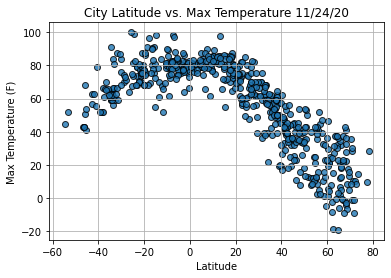

In [25]:
# Import time module
import time

#Build the scatter plot for latitude vs. max temperature 
plt.scatter(lats,
           max_temps,
           edgecolor="black", linewidths=1, marker="o",
           alpha=.8, label="Cities")
# Incorporate the other graph properties
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

#Save the figure
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

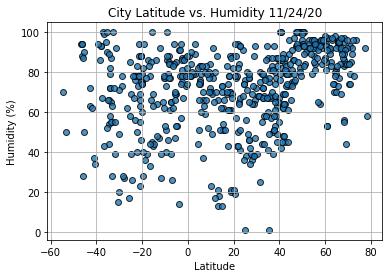

In [27]:
# Import time module
import time

#Build the scatter plot for latitude vs. humidity
plt.scatter(lats,
           humidity,
           edgecolor="black", linewidths=1, marker="o",
           alpha=.8, label="Cities")
# Incorporate the other graph properties
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

#Save the figure
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

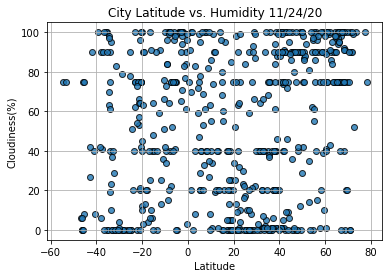

In [28]:
# Import time module
import time

#Build the scatter plot for latitude vs. cloudiness
plt.scatter(lats,
           cloudiness,
           edgecolor="black", linewidths=1, marker="o",
           alpha=.8, label="Cities")
# Incorporate the other graph properties
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Cloudiness(%)")
plt.xlabel("Latitude")
plt.grid(True)

#Save the figure
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

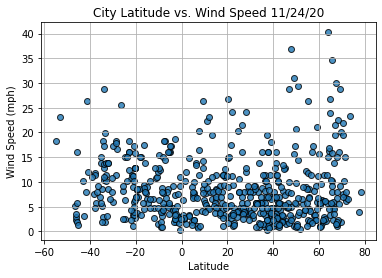

In [30]:
# Import time module
import time

#Build the scatter plot for latitude vs. wind Speed
plt.scatter(lats,
           wind_speed,
           edgecolor="black", linewidths=1, marker="o",
           alpha=.8, label="Cities")
# Incorporate the other graph properties
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

#Save the figure
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()